In [1]:
Train_Path= "Dataset/Train"
Val_Path= "Dataset/Test"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


## CNN based seqn model

In [3]:
model= Sequential()

model.add(Conv2D(32,kernel_size= (3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

## Training from scratch

In [5]:
train_datagen= image.ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,)

test_dataset= image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator= train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size= (224,224),
    batch_size=32,
    class_mode='binary')


Found 260 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator= test_dataset.flow_from_directory(
    'Dataset/Test',
    target_size= (224,224),
    batch_size=32,
    class_mode='binary'
)

Found 132 images belonging to 2 classes.


In [9]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
hist= model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs= 10,
    validation_data= validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 29s 4s/step - loss: 1.1480 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.4844
Epoch 2/10
8/8 [==============================] - 26s 3s/step - loss: 0.7027 - accuracy: 0.5658 - val_loss: 0.6604 - val_accuracy: 0.7812
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.6275 - accuracy: 0.6974 - val_loss: 0.5617 - val_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 27s 3s/step - loss: 0.4498 - accuracy: 0.8008 - val_loss: 0.2946 - val_accuracy: 0.9531
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.4048 - accuracy: 0.8640 - val_loss: 0.2454 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 27s 3s/step - loss: 0.4669 - accuracy: 0.7939 - val_loss: 0.4321 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.3894 - accuracy: 0.8377 

Class activation maps;
grad cam for further understanding the model

In [12]:
model.save("model_adv.h5")

In [13]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.2680407762527466, 0.949999988079071]

In [14]:
model.evaluate_generator(validation_generator)

[0.17327110469341278, 0.9848484992980957]

## Test Images

In [16]:
model= load_model('model_adv.h5')

In [17]:
import os

In [18]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [19]:
y_actual= []
y_test= []

In [20]:
for i in os.listdir("Dataset/Test/Normal/"):
    img= image.load_img("Dataset/Test/Normal/"+i, target_size=(224,224))
    img= image.img_to_array(img)
    img= np.expand_dims(img, axis=0)
    p= model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
for i in os.listdir("Dataset/Test/Covid/"):
    img= image.load_img("Dataset/Test/Covid/"+i, target_size=(224,224))
    img= image.img_to_array(img)
    img= np.expand_dims(img, axis=0)
    p= model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [22]:
y_actual= np.array(y_actual)
y_test= np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_actual, y_test)

In [24]:
import seaborn as sns

<AxesSubplot:>

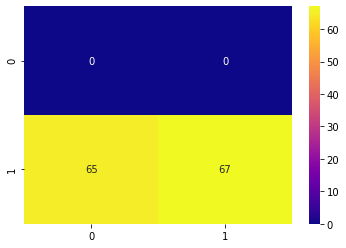

In [25]:
sns.heatmap(cm, cmap="plasma", annot=True)